Task 1: EDA and Visualization of a Dataset
-----------------------------------------
Description:

 Perform exploratory data analysis (EDA) on a small dataset like the Titanic Dataset.
Steps:

1. Load the Dataset: Use Pandas to load the dataset.
2. Data Cleaning: 
   -Handle missing values (use simple techniques like filling with mean/median).
   -Remove duplicates (if any).
3. Visualizations: 
   -Create a few basic plots (bar chart for one categorical variable, histogram for one numeric variable).
   -Generate a correlation heatmap.
4. Summarize Insights: Write 3–4 key observations.

Outcome:
A Jupyter Notebook with the EDA process, basic visualizations, and a short summary of findings.


Step 1: Loads the dataset with pandas
-------------------------------------

In [126]:
import pandas as pd
df=pd.read_csv('titanic.csv')

Note: Following Steps are not the part of task but it is mendatory to understand the data:
---------------------------
Displays column names, number of rows, data types

In [127]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB
None


Show summary statistics

In [128]:
print(df.describe())

            pclass     survived          age        sibsp        parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean      2.294882     0.381971    29.881138     0.498854     0.385027   
std       0.837836     0.486055    14.413493     1.041658     0.865560   
min       1.000000     0.000000     0.170000     0.000000     0.000000   
25%       2.000000     0.000000    21.000000     0.000000     0.000000   
50%       3.000000     0.000000    28.000000     0.000000     0.000000   
75%       3.000000     1.000000    39.000000     1.000000     0.000000   
max       3.000000     1.000000    80.000000     8.000000     9.000000   

              fare        body  
count  1308.000000  121.000000  
mean     33.295479  160.809917  
std      51.758668   97.696922  
min       0.000000    1.000000  
25%       7.895800   72.000000  
50%      14.454200  155.000000  
75%      31.275000  256.000000  
max     512.329200  328.000000  


Check for missing vlaue:

In [129]:
#True for missing values in each column
print(df.isnull())

      pclass  survived   name    sex    age  sibsp  parch  ticket   fare  \
0      False     False  False  False  False  False  False   False  False   
1      False     False  False  False  False  False  False   False  False   
2      False     False  False  False  False  False  False   False  False   
3      False     False  False  False  False  False  False   False  False   
4      False     False  False  False  False  False  False   False  False   
...      ...       ...    ...    ...    ...    ...    ...     ...    ...   
1304   False     False  False  False  False  False  False   False  False   
1305   False     False  False  False   True  False  False   False  False   
1306   False     False  False  False  False  False  False   False  False   
1307   False     False  False  False  False  False  False   False  False   
1308   False     False  False  False  False  False  False   False  False   

      cabin  embarked   boat   body  home.dest  
0     False     False  False   True   

Missing value count in each column:

In [130]:
print(df.isnull().sum())

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


Step 2. Data Cleaning: 
---------------------
   -Handle missing values (use simple techniques like filling with mean/median).


In [131]:
# Drop columns with too many missing values
df.drop(['cabin', 'boat', 'body', 'home.dest'], axis=1, inplace=True)

# Fill missing values in 'age' and 'fare' with their median
df['age']= df['age'].fillna(df['age'].median())
df['fare']=df['fare'].fillna(df['fare'].median())   

# Fill missing values in 'embarked' with mode (most frequent value)
df['embarked']= df['embarked'].fillna(df['embarked'].mode()[0])

#Remove duplicates (if any).
df.drop_duplicates(inplace=True)
#verify if there are any missing values left
df.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

# Step 3: Visualizations
 -----------------------

C:\Users\Muhammad Mamoon\AppData\Local\Temp\ipykernel_4624\3837618529.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sex", data=df, palette="Set2")


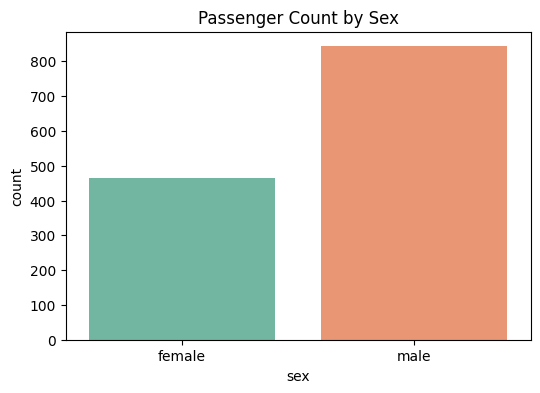

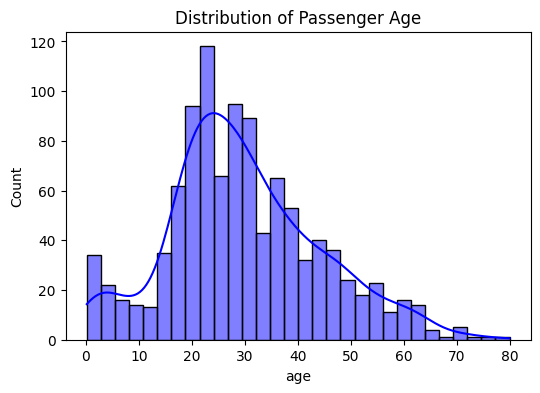

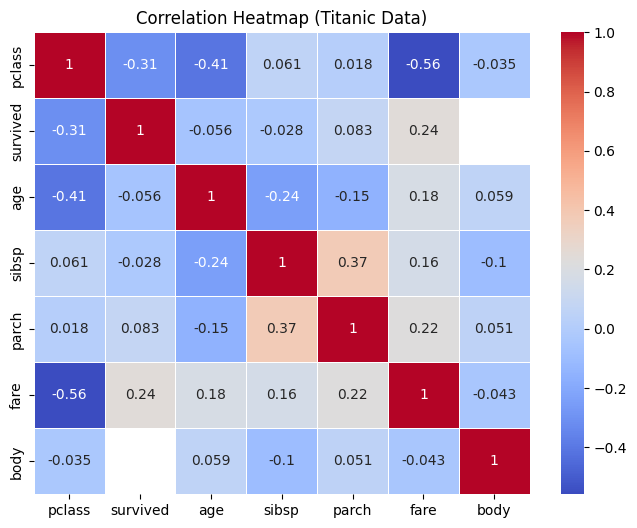

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("titanic.csv")

# Normalize column names to lowercase
df.columns = df.columns.str.lower()

# --- Bar chart (sex) ---
plt.figure(figsize=(6,4))
sns.countplot(x="sex", data=df, palette="Set2")
plt.title("Passenger Count by Sex")
plt.show()

# --- Histogram (age) ---
plt.figure(figsize=(6,4))
sns.histplot(df["age"], bins=30, kde=True, color="blue")
plt.title("Distribution of Passenger Age")
plt.show()

# --- Correlation heatmap ---
plt.figure(figsize=(8,6))
corr = df.corr(numeric_only=True)   # to avoid object columns error
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap (Titanic Data)")
plt.show()


# Step 4: Summarize Insights
--------------------------
# Based on the plots & heatmap, write 3-4 key findings:


    1. The dataset shows more male passengers compared to female passengers.
    2. Age distribution indicates most passengers were between 20–40 years old.
    3. Correlation heatmap suggests that 'Fare' has a moderate positive correlation with 'Survived', meaning higher-paying passengers had better survival chances.
    4. Passenger Class (Pclass) is negatively correlated with 'Fare' and 'Survived' — lower class passengers had lower survival rates.

